In [28]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Import CSV File
nr_2017_sta_path = "Input_Data/Nice_Ride_2017_station_locations.csv"
nr_2017_trip_path = "Input_Data/Nice_ride_trip_history_2017_season.csv"

In [30]:
#Read data to df
station_17 = pd.read_csv(nr_2017_sta_path, dtype={"Terminal":int, "Station":str, "Latitude":float, "Longitude":float, "NbDocks":int, "Notes":str})
station_17.head()

,Number,Name,Latitude,Longitude,Total docks
0,30000,100 Main Street SE,44.984892,-93.256551,27
1,30001,25th Street & 33rd Ave S,44.957341,-93.223374,15
2,30002,Riverside Ave & 23rd Ave S,44.967115,-93.240149,15
3,30003,Plymouth Ave N & N Oliver Ave,44.991412,-93.306269,15
4,30004,11th Street & Hennepin,44.975340,-93.278690,23


In [31]:
len(station_17)

202

In [32]:
station_17 = station_17.drop(columns=["Total docks"])
station_17

,Number,Name,Latitude,Longitude
0,30000,100 Main Street SE,44.984892,-93.256551
1,30001,25th Street & 33rd Ave S,44.957341,-93.223374
2,30002,Riverside Ave & 23rd Ave S,44.967115,-93.240149
3,30003,Plymouth Ave N & N Oliver Ave,44.991412,-93.306269
4,30004,11th Street & Hennepin,44.975340,-93.278690
...,...,...,...,...
197,30201,Elwood Ave N & Oak Park Ave N,44.987160,-93.301944
198,30202,Mill City Quarter,44.980500,-93.261800
199,30203,W 50th Street & W Minnehaha Pkwy,44.912125,-93.298552
200,30204,NE Central Ave & NE 14th Ave,45.002526,-93.247162


In [33]:
# Export .csv
station_17.to_csv(path_or_buf="Resources/Nice_ride_2017_station_locations.csv", index=False)

In [34]:
station_17.rename(columns={"Number" : "station_id", 
                           "Name" : "station_name", 
                           "Latitude" : "station_lat", 
                           "Longitude" : "station_lng"}, 
                  inplace=True)
station_17

,station_id,station_name,station_lat,station_lng
0,30000,100 Main Street SE,44.984892,-93.256551
1,30001,25th Street & 33rd Ave S,44.957341,-93.223374
2,30002,Riverside Ave & 23rd Ave S,44.967115,-93.240149
3,30003,Plymouth Ave N & N Oliver Ave,44.991412,-93.306269
4,30004,11th Street & Hennepin,44.975340,-93.278690
...,...,...,...,...
197,30201,Elwood Ave N & Oak Park Ave N,44.987160,-93.301944
198,30202,Mill City Quarter,44.980500,-93.261800
199,30203,W 50th Street & W Minnehaha Pkwy,44.912125,-93.298552
200,30204,NE Central Ave & NE 14th Ave,45.002526,-93.247162


In [35]:
trip_17 = pd.read_csv(nr_2017_trip_path, dtype={"Start date":str, "Start station":str, "Start station number":str, "End date":str, "End station":str, "End station number":str, "Total duration (Seconds)":int, "Account type":str})
trip_17.head()

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds)
0,11/5/2017 21:45,Hennepin Ave & S Washington Ave,30184,11/5/2017 22:02,Logan Park,30104,Member,1048
1,11/5/2017 21:45,Broadway Street N & 4th Street E,30122,11/5/2017 22:26,Broadway Street N & 4th Street E,30122,Member,2513
2,11/5/2017 21:43,Dale Street & Grand Ave.,30106,11/5/2017 22:13,N Milton Street & Summit Ave,30101,Member,1817
3,11/5/2017 21:41,Weisman Art Museum,30183,11/5/2017 22:05,22nd Ave S & Franklin Ave,30014,Casual,1399
4,11/5/2017 21:38,South 2nd Street & 3rd Ave S,30030,11/5/2017 21:44,6th Ave SE & University Ave,30088,Member,370


In [36]:
total_2017_trips = len(trip_17)
total_2017_trips

460718

In [37]:
trip_17["Start date"] = pd.to_datetime(trip_17["Start date"])
trip_17["End date"] = pd.to_datetime(trip_17["End date"])

In [38]:
trip_17.rename(columns={"Start date" : "start_datetime", 
                        "Start station" : "start_station_name", 
                        "Start station number" : "start_station_id",
                        "End date" : "end_datetime",
                        "End station" : "end_station_name",
                        "End station number" : "end_station_id",
                        "Total duration (Seconds)" : "total_duration_sec",
                        "Account type" : "account_type"}, 
              inplace=True)

In [39]:
trip_17.head()

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,account_type,total_duration_sec
0,2017-11-05 21:45:00,Hennepin Ave & S Washington Ave,30184,2017-11-05 22:02:00,Logan Park,30104,Member,1048
1,2017-11-05 21:45:00,Broadway Street N & 4th Street E,30122,2017-11-05 22:26:00,Broadway Street N & 4th Street E,30122,Member,2513
2,2017-11-05 21:43:00,Dale Street & Grand Ave.,30106,2017-11-05 22:13:00,N Milton Street & Summit Ave,30101,Member,1817
3,2017-11-05 21:41:00,Weisman Art Museum,30183,2017-11-05 22:05:00,22nd Ave S & Franklin Ave,30014,Casual,1399
4,2017-11-05 21:38:00,South 2nd Street & 3rd Ave S,30030,2017-11-05 21:44:00,6th Ave SE & University Ave,30088,Member,370


In [41]:
# Export .csv
#trip_17.to_csv(path_or_buf="Resources/Nice_ride_trip_history_2017_season.csv", index=False)

In [42]:
member_trips = trip_17.loc[(trip_17["account_type"] == "Member"), :]
total_2017_member_trips = len(member_trips)
total_2017_member_trips

290070

In [43]:
casual_trips = trip_17.loc[(trip_17["account_type"] == "Casual"), :]
total_2017_casual_trips = len(casual_trips)
total_2017_casual_trips

170646

In [44]:
odd_trips = trip_17.loc[(trip_17["account_type"] != "Member") & (trip_17["account_type"] != "Casual"), :]
odd_trips

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,account_type,total_duration_sec
168157,2017-08-08 10:51:00,N 4th Ave & W River Parkway,30144,2017-08-08 10:57:00,N 4th Ave & W River Parkway,30144,Inconnu,358
334673,2017-06-10 18:30:00,7th Place & Jackson Street,30118,2017-06-10 19:28:00,7th Place & Jackson Street,30118,Inconnu,3495


In [45]:
pct_2017_member_trips = round((total_2017_member_trips / total_2017_trips) * 100, 2)
pct_2017_member_trips

62.96

In [46]:
pct_2017_casual_trips = round((total_2017_casual_trips / total_2017_trips) * 100, 2)
pct_2017_casual_trips

37.04

In [72]:
index = ['ridership breakdown']

In [74]:
acct_type_pct_trip_dict = [{"pct_2017_member_trips": pct_2017_member_trips,
                            "pct_2017_casual_trips": pct_2017_casual_trips}]
acct_type_pct_trip_df = pd.DataFrame(acct_type_pct_trip_dict, index)
acct_type_pct_trip_df

,pct_2017_member_trips,pct_2017_casual_trips
ridership breakdown,62.96,37.04


In [59]:
# Set x axis and tick locations
x_axis = ["pct_2017_member_trips", "pct_2017_casual_trips"]
#tick_locations = [value+0.4 for value in x_axis]
x_axis

['pct_2017_member_trips', 'pct_2017_casual_trips']

In [60]:
y_axis = [pct_2017_member_trips, pct_2017_casual_trips]
y_axis

[62.96, 37.04]

<function matplotlib.pyplot.show(*args, **kw)>

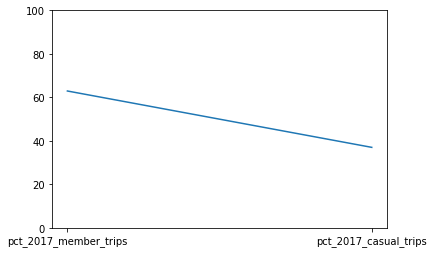

In [64]:
plt.plot(x_axis, y_axis)
plt.ylim(0, 100)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

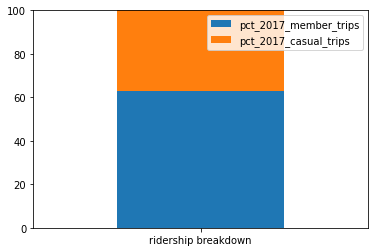

In [76]:
ax = acct_type_pct_trip_df.plot.bar(rot=0, stacked=True)
plt.ylim(0, 100)
plt.show